<a href="https://colab.research.google.com/github/taraliu23/Urban-Data-Science/blob/main/GSV_greenspace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Urban Data Science

## Topic: 🌲Google Street View (GSV) and Computer Vision 👀

### Quantifying and Mapping Atlanta Midtown's Greenery and Walkability

📝 todo:

📋 how to make this a hackthon

📋 visualize segmentation result (e.g. sidewalk, tree in different colors)

📋 detailed guide on API keys and set env varibales


## Resources:

1. Computer Vision model selection: https://universe.roboflow.com/search?q=class:sidewalk

2.

### Project Overview

This project uses Google Street View (GSV) images and image segementation methods to analyze greenery and walkability in Midtown Atlanta.

The results provide actionable insights for urban green space and sidewalk planning.

### Objectives

Greenery Analysis: Quantify greenery coverage in urban environments.

Walkability Analysis: Estimate walkability scores based on street-level features (e.g., sidewalks).

Data Visualization: Map findings in spatial distribution of greenery and walkability.

### Tools and Technologies
Language: Python

Libraries:
- google-streetview: Download GSV images.
- keras-segmentation: Semantic segmentation for greenery analysis.
- opencv-python: Analyze edges for walkability.
- pandas: Wrangle and orginize data.
- matplotlib: Create scatterplots.
- folium: Visualize spatial data.

Environment: Jupyter Notebook with Google Colab

Other Requirements: Google API Key

### Deliverables
1. Interactive Map: Spatial distribution of greenery and walkability in Midtown Atlanta.
2. Key Visualizations: Scatterplot of greenery vs. walkability. Heatmap of greenery scores.
3. Summary Document: One-page brief summarizing results and insights.


## Step 1: Set Up

1. change runtime to GPU for faster computing.

In [ ]:
! nvidia-smi

Mon Dec 23 17:56:51 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

2. Install Required Libraries

In [ ]:
! pip install google_streetview opencv-python keras-segmentation pandas numpy matplotlib folium

In [ ]:
import google_streetview.api
import os
from google.colab import userdata

3. Set API key

Please follow [this instruction](https://developers.google.com/maps/documentation/streetview/get-api-key)to create an API Key for static street view download.

In [1]:
Image('/content/1.jpg')

NameError: name 'Image' is not defined

## Step 2: Download Google Street View Images

In [ ]:
# Set up API key
API_KEY = userdata.get('Street_View_Static_API_Key')

# Define coordinates for Midtown Atlanta
locations = [
    "33.7800,-84.3850",
    "33.7810,-84.3860",
    "33.7820,-84.3870",

]

os.makedirs("gsv_images", exist_ok=True)

# Download images
for idx, location in enumerate(locations):
    params = [{
        "size": "640x640",
        "location": location,
        "heading": "0",  # Can also test with headings: 0, 90, 180, 270
        "pitch": "0",
        "key": API_KEY
    }]
    results = google_streetview.api.results(params)
    results.download_links(f"gsv_images/image_{idx}.jpg")

## Step 3: Greenery Analysis

In [ ]:
from keras_segmentation.models.unet import vgg_unet
import cv2
import numpy as np
import os

# Load pre-trained U-Net model
model = vgg_unet(n_classes=2, input_height=640, input_width=640)

# Function to calculate greenery score
def calculate_greenery(image_path):
    # Load and resize image
    image = cv2.imread(image_path)
    # resized_image = cv2.resize(image, (320, 320))

    # Predict segmentation
    segmented = model.predict_segmentation(inp=image)

    # Calculate greenery score
    greenery_pixels = np.sum(segmented == 1)  # Assuming class 1 represents greenery
    total_pixels = segmented.size
    return greenery_pixels / total_pixels

# # Analyze all images
# image_dir = "gsv_images"
# greenery_scores = []
# for image_file in os.listdir(image_dir):
#     greenery_score = calculate_greenery(os.path.join(image_dir, image_file))
#     greenery_scores.append(greenery_score)

# # Print results
# for idx, score in enumerate(greenery_scores):
#     print(f"Image {idx}: Greenery Score = {score:.2f}")


In [ ]:
print(calculate_greenery('/content/gsv_images/gsv_0.jpg'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
0.283427734375


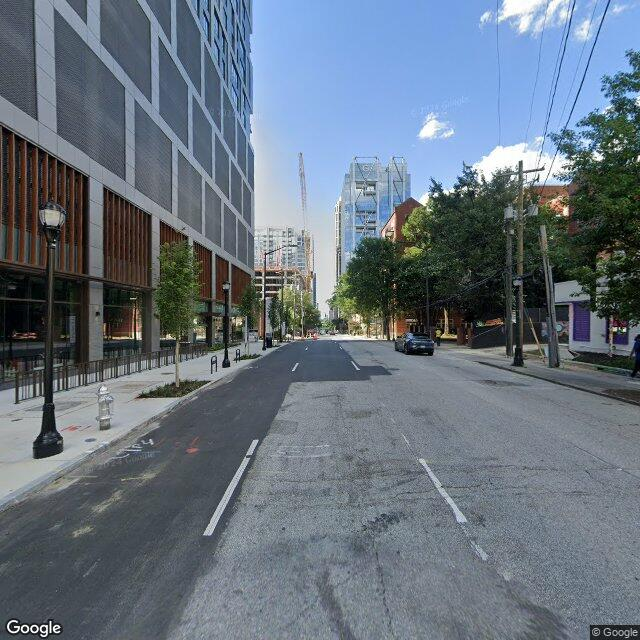

In [ ]:

from IPython.display import Image
Image('/content/gsv_images/gsv_0.jpg')


## Step 4: Walkability Analysis

In [ ]:
def detect_edges(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Canny edge detection
    edges = cv2.Canny(image, 100, 200)

    # Calculate walkability proxy (edge density)
    edge_density = np.sum(edges > 0) / (image.shape[0] * image.shape[1])
    return edge_density

# # Analyze all images for walkability
# walkability_scores = []
# for image_file in os.listdir(image_dir):
#     walkability_score = detect_edges(os.path.join(image_dir, image_file))
#     walkability_scores.append(walkability_score)

# # Print results
# for idx, score in enumerate(walkability_scores):
#     print(f"Image {idx}: Walkability Score = {score:.2f}")


In [ ]:
detect_edges('/content/gsv_images/gsv_1.jpg')

0.17285888671875

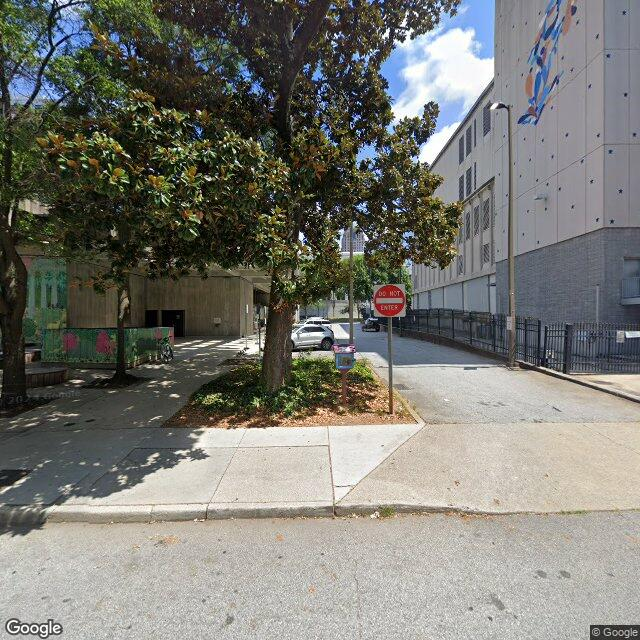

In [ ]:
Image('/content/gsv_images/gsv_1.jpg')

## Step 5: Combine Result and Visualization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame for results
data = pd.DataFrame({
    "Location": locations,
    "Greenery Score": greenery_scores,
    "Walkability Score": walkability_scores
})

# Save results to a CSV
data.to_csv("results.csv", index=False)

# Scatterplot: Greenery vs. Walkability
plt.scatter(data["Greenery Score"], data["Walkability Score"], alpha=0.7)
plt.title("Greenery vs. Walkability")
plt.xlabel("Greenery Score")
plt.ylabel("Walkability Score")
plt.grid()
plt.show()

## Step 6: Map spatial distribution of Greenery and Walkability
